# Jupyter Notebook for producing Figures 7 and 8 in arXiv:1902.01789

In [5]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams

%matplotlib inline

- Below are functions that read in both the direct detection responses (for Xenon1T 2018) from files named "DD\_response" and the parameter values named majorana\_* . 

- The first function gets rid of any faulty points in the data and combines the parameters and responses. 
- The second function does the same, but only keeps points that aren't excluded by Xenon 1T 2018. 

In [2]:

def allowed_points_majorana(path):
    DD_data=np.genfromtxt(path +'/DD_response.dat', delimiter=' ', 
              skip_header=2)
    more_info = path.split('/')[1].split('=')
    
    if path.split('/')[2].split('=')[1][0] == 'g':
            mult = '1'
    else:
        mult ='4'
        
    params_list = np.genfromtxt(path +'/majorana_'+more_info[0]+more_info[1]+'_DD_x'+mult+'.dat', 
              delimiter='\t',
              skip_header=2)
            
    nan_list = []
    for i in range(len(params_list[:,0])):
        for j in range(len(params_list[i,:])):
            if math.isnan(params_list[i,j]):
                nan_list.append(i)
                break
    
    cut_list =np.zeros([len(DD_data[:,0])-len(nan_list), len(DD_data[0,:])])
    param_cut =np.zeros([len(params_list[:,0])-len(nan_list), len(params_list[0,:])])
   
    j = 0
    for i in range(len(DD_data[:,0])) :

        if np.any(i in nan_list):
            entry = i+3
            #print "Entry %i has nans" % entry
        else:
            for k in range(len(cut_list[0,:])):
                cut_list[j,k] = DD_data[i,k]
            for l in range(len(param_cut[0,:])):
                param_cut[j,l] = params_list[i,l]
            j+=1 
    return cut_list, param_cut

def exp_allowed_points_majorana(path):
    DD_data=np.genfromtxt(path +'/DD_response.dat', delimiter=' ', 
              skip_header=2)
    more_info = path.split('/')[1].split('=')
    
    if path.split('/')[2].split('=')[1][0] == 'g':
            mult = '1'
    else:
        mult ='4'
        
    params_list = np.genfromtxt(path +'/majorana_'+more_info[0]+more_info[1]+'_DD_x'+mult+'.dat', 
              delimiter='\t',
              skip_header=2)
    list_allowed = [] 
    for i in range(len(DD_data[:,0])):
        #print DD_data[i,:]
        if DD_data[i,1] < 3.6823:
            list_allowed.append(i)
    
    #print list_allowed
    nan_list = []
    for i in range(len(params_list[:,0])):
        for j in range(len(params_list[i,:])):
            if math.isnan(params_list[i,j]):
                nan_list.append(i)
                break
                
    cut_list =np.zeros([len(list_allowed)-len(nan_list), len(DD_data[0,:])])
    param_cut =np.zeros([len(list_allowed)-len(nan_list), len(params_list[0,:])])
    j = 0
    for i in range(len(DD_data[:,0])) :

        if np.any(i not in list_allowed or i in nan_list):
            entry = i+3
            #print "Entry %i has nans" % entry
        else:
            for k in range(len(cut_list[0,:])):
                cut_list[j,k] = DD_data[i,k]
            for l in range(len(param_cut[0,:])):
                param_cut[j,l] = params_list[i,l]
            j+=1 
    return cut_list, param_cut 


- Now we load in the points

In [4]:
gmu2_gb4gs=allowed_points_majorana('Model_parameters/gmu=2/gb=4gs/data_files')
gmu4_gb4gs=allowed_points_majorana('Model_parameters/gmu=4/gb=4gs/data_files')
gmu2_gbgs=allowed_points_majorana('Model_parameters/gmu=2/gb=gs/data_files')
gmu4_gbgs=allowed_points_majorana('Model_parameters/gmu=4/gb=gs/data_files')

- Collate in arrays

In [5]:
majors = [gmu2_gbgs,gmu4_gbgs, gmu2_gb4gs,gmu4_gb4gs]
majors_titles=['$g_{\mu}=2,\, g_b=g_s$','$g_{\mu} = \sqrt{4\pi},\, g_b=g_s$','$g_{\mu}=2,\, g_b=4g_s$', 
               '$g_{\mu}=\sqrt{4\pi},\, g_b=4g_s$']
        

- Below are LHC constraints from Figure 6

In [10]:
med_lims=[1000,1100,1000,1100]
DM_lims=[31,31,13,13]

## Figure 7, Anapole

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


(3.0, 1000.0)

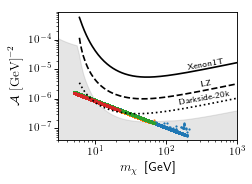

In [8]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(3.2, 2.4), dpi=80, facecolor='w', edgecolor='k')
floor = np.genfromtxt('Neutrino_floors/floor_anapole.dat', delimiter=' ')

ana_X1T = np.genfromtxt('Direct_Detection_Exclusions/Xe1T_Anapole_line.dat', delimiter=' ')
plt.loglog(ana_X1T[:,0], ana_X1T[:,1], label='Xenon 1T', color='black')

darkside = np.genfromtxt('Direct_Detection_Exclusions/darkside20k_anapoleline.dat', delimiter=' ')
plt.loglog(darkside[:,0], darkside[:,1], label='Darkside 20k', color='black', linestyle=':')

ana_LZ = np.genfromtxt('Direct_Detection_Exclusions/LZ_anapole.dat', delimiter=' ')
plt.loglog(ana_LZ[:,0], ana_LZ[:,1], label='LZ', color='black', linestyle='dashed')

plt.text(200,1.5e-5,'Xenon1T', size =8 , rotation=10.)
plt.text(300, 3e-6,'LZ', size =8 , rotation=10.)
plt.text(150, 1.2e-6,'Darkside-20k', size =8 , rotation=10.)


plt.fill_between(floor[:,0], floor[:,1],np.zeros(np.size(floor[:,0])), color='Gray', alpha=0.2)

for k in [3,2,1,0]:
    plt.scatter(majors[k][1][:,0],majors[k][1][:,9], s=1.0)
        
        
plt.xlabel(r'$m_{\chi}\,$ [GeV]', size=12)
plt.ylabel(r'$ A\,\,$ [GeV]$^{-2}$', size=12)


plt.tight_layout()
plt.ylim(ymin=4e-8)
plt.xlim(xmin=3.0, xmax=1e3)

#plt.savefig('anapole_plot_noLHC.png', format='png', dpi=400)

(3.0, 1000.0)

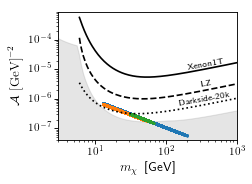

In [14]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(3.2, 2.4), dpi=80, facecolor='w', edgecolor='k')

floor = np.genfromtxt('Neutrino_floors/floor_anapole.dat', delimiter=' ')

ana_X1T = np.genfromtxt('Direct_Detection_Exclusions/Xe1T_Anapole_line.dat', delimiter=' ')
plt.loglog(ana_X1T[:,0], ana_X1T[:,1], label='Xenon 1T', color='black')

darkside = np.genfromtxt('Direct_Detection_Exclusions/darkside20k_anapoleline.dat', delimiter=' ')
plt.loglog(darkside[:,0], darkside[:,1], label='Darkside 20k', color='black', linestyle=':')

ana_LZ = np.genfromtxt('Direct_Detection_Exclusions/LZ_anapole.dat', delimiter=' ')
plt.loglog(ana_LZ[:,0], ana_LZ[:,1], label='LZ', color='black', linestyle='dashed')


plt.text(200,1.5e-5,'Xenon1T', size =8 , rotation=10.)
plt.text(300, 3e-6,'LZ', size =8 , rotation=10.)
plt.text(150, 1.1e-6,'Darkside-20k', size =8 , rotation=10.)

plt.fill_between(floor[:,0], floor[:,1],np.zeros(np.size(floor[:,0])), color='Gray', alpha=0.2)


for k in [3,2,1,0]:
    target = []
    
    for l in range(len(majors[k][1][:,9])):

        if majors[k][1][l,1] > med_lims[k] and majors[k][1][l,0] > DM_lims[k]:
            if len(target)==0:
                target = [[majors[k][1][l,0],majors[k][1][l,9]]]
            else: 
                target = np.append(target,[[majors[k][1][l,0],majors[k][1][l,9]]], axis=0)

    if len(target) != 0:
        plt.scatter(target[:,0],target[:,1], s=1.0)

plt.xlabel(r'$m_{\chi}\,$ [GeV]', size=12)
plt.ylabel(r'$ A\,\,$ [GeV]$^{-2}$', size=12)

plt.tight_layout()
plt.ylim(ymin=4e-8)
plt.xlim(xmin=3.0, xmax=1e3)

#plt.savefig('anapole_plot_LHC.png', format='png', dpi=400)

## Figure 8, c1 response from twist-2 operator

- Function to go from parameters to c1 coefficient in the Non-relativistic EFT. See Refs. [89-91]

In [ ]:
mproton = 0.938272046
higgs_vev = 246.2
pbGeVfactor = 2.67e-9

In [ ]:
def c1_from_params(mchi,m_phiq, gu, gs, gc, gb, gt):
    
        prefact = mproton*mchi
        prefact*=(1./(mchi*mchi - m_phiq*m_phiq))
        prefact*=(1./(mchi*mchi - m_phiq*m_phiq))
        prefact*=higgs_vev*higgs_vev
        quark_bit = (0.0186*gu*gu + 0.03412*gu*gu + 0.0448*gs*gs) 
        quark_bit += 0.06739*(gt*gt+gc*gc+gb*gb)
        
        return prefact*quark_bit

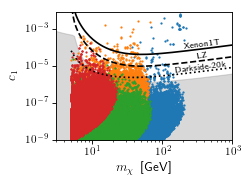

In [18]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(3.2, 2.4), dpi=80, facecolor='w', edgecolor='k')
floor = np.genfromtxt('Neutrino_floors/floor_Op1.dat', delimiter=' ')
X1T2 = np.genfromtxt("Direct_Detection_Exclusions/X1t_all_coeffs_exclusion.dat", delimiter=' ')
LZ = np.genfromtxt("Direct_Detection_Exclusions/LZ_all_coeffs_exclusion.dat", delimiter=' ')
darkside = np.genfromtxt('Direct_Detection_Exclusions/darkside20k_c1.dat', delimiter=' ')
k=0

majors_color = ['#d62728','#ff7f0e', '#2ca02c','#1f77b4']

plt.fill_between(floor[:,0], floor[:,1]
        ,np.zeros(np.size(floor[:,0])), color='Gray', alpha=0.3)


for k in [3,2,1,0]:
    c1s = c1_from_params(majors[k][1][:,0],majors[k][1][:,1],
                         majors[k][1][:,4], majors[k][1][:,7],
                         majors[k][1][:,5],majors[k][1][:,8],
                         majors[k][1][:,6])
    
    plt.scatter(majors[k][1][:,0],c1s[:], s=1.0)

plt.xlim( xmin = 3,xmax=1e3)
plt.ylim( ymax = 1e-2,ymin=4e-7)
        

plt.xlim( xmin = 3,xmax=1e3)
plt.ylim( ymax = 9e-3,ymin=1e-9)
        
plt.xlabel('$m_{\chi}\,$ [GeV]', size=12)
plt.ylabel('$c_{1}$', size=12) 
plt.text(200,1.5e-4,'Xenon1T', size =8 , rotation=7.)
plt.text(300, 3e-5,'LZ', size =8 , rotation=10.) 
plt.text(150, 9e-6,'Darkside-20k', size =8 , rotation=7.)
plt.loglog(X1T2[:,0], X1T2[:,1], label='Andrew', color='black')
plt.loglog(LZ[:,0], LZ[:,1], label='Andrew', color='black', linestyle='dashed')   
plt.loglog(darkside[:,0], darkside[:,1], linestyle=':', color='black')   
plt.tight_layout()
#plt.savefig('c1_noLHC.png', dpi=400)

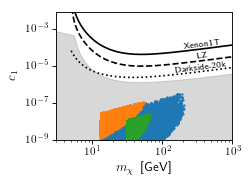

In [20]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(3.2, 2.4), dpi=80, facecolor='w', edgecolor='k')
floor = np.genfromtxt('Neutrino_floors/floor_Op1.dat', delimiter=' ')
X1T2 = np.genfromtxt("Direct_Detection_Exclusions/X1t_all_coeffs_exclusion.dat", delimiter=' ')
LZ = np.genfromtxt("Direct_Detection_Exclusions/LZ_all_coeffs_exclusion.dat", delimiter=' ')
darkside = np.genfromtxt('Direct_Detection_Exclusions/darkside20k_c1.dat', delimiter=' ')

k=0

majors_color = ['#d62728','#ff7f0e', '#2ca02c','#1f77b4']

plt.fill_between(floor[:,0], floor[:,1]
                 ,np.zeros(np.size(floor[:,0])), color='Gray', alpha=0.3)

for k in [3,2,1,0]:
    target = []
    c1s = c1_from_params(majors[k][1][:,0],majors[k][1][:,1],
                         majors[k][1][:,4], majors[k][1][:,7],
                         majors[k][1][:,5],majors[k][1][:,8],
                         majors[k][1][:,6])
    for l in range(len(c1s[:])):

        if majors[k][1][l,1] > med_lims[k] and majors[k][1][l,0] > DM_lims[k]:
            if len(target)==0:
                target = [[majors[k][1][l,0],c1s[l]]]
            else: 
                target = np.append(target,[[majors[k][1][l,0],c1s[l]]], axis=0)

    if len(target) != 0:
        plt.scatter(target[:,0],target[:,1], s=1.0)

plt.xlim( xmin = 3,xmax=1e3)
plt.ylim( ymax = 9e-3,ymin=1e-9)
        
plt.xlabel('$m_{\chi}\,$ [GeV]', size=12)
plt.ylabel('$c_{1}\, $', size=12)       
plt.text(200,1.5e-4,'Xenon1T', size =8 , rotation=7.)
plt.text(300, 3e-5,'LZ', size =8 , rotation=10.) 
plt.text(150, 9e-6,'Darkside-20k', size =8 , rotation=7.)
plt.loglog(X1T2[:,0], X1T2[:,1], label='Andrew', color='black')
plt.loglog(LZ[:,0], LZ[:,1], label='Andrew', color='black', linestyle='dashed')   
plt.loglog(darkside[:,0], darkside[:,1], linestyle=':', color='black')
plt.tight_layout()

#plt.savefig('c1_LHC.png', dpi=400)